# Upload do CSV

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import unicodedata


# Carregar base vendas tratada
df_vendas = pd.read_csv(
    "base_vendas_tratada.csv",
    encoding="utf-8-sig"
)

# Carregar base vendas tratada
df_produtos = pd.read_csv(
    "base_produtos_tratada.csv",
    encoding="utf-8-sig"
)
df_vendas.head()


,cliente,idade,estado,produto,quantidade_vendida,preço_unitario,data,valor_total
0,9010,72.0,SANTA CATARINA,E,243,50,2024-10-26,12150
1,63611,46.0,PARANÁ,B,320,15,2024-12-27,4800
2,56708,67.0,BAHIA,D,143,30,2023-06-30,4290
3,3924,46.0,SÃO PAULO,B,295,15,2025-06-02,4425
4,47317,53.0,RIO DE JANEIRO,C,203,45,2025-02-15,9135


# Merge de Vendas com Categoria

In [ ]:
df_vendas = df_vendas.merge(
    df_produtos,
    on="produto",
    how="left"
)
df_vendas.head()

,cliente,idade,estado,produto,quantidade_vendida,preço_unitario,data,valor_total,categoria
0,9010,72.0,SANTA CATARINA,E,243,50,2024-10-26,12150,JARDINAGEM
1,63611,46.0,PARANÁ,B,320,15,2024-12-27,4800,MANGUEIRAS
2,56708,67.0,BAHIA,D,143,30,2023-06-30,4290,LIMPEZA
3,3924,46.0,SÃO PAULO,B,295,15,2025-06-02,4425,MANGUEIRAS
4,47317,53.0,RIO DE JANEIRO,C,203,45,2025-02-15,9135,UTILIDADES DOMÉSTICAS


# 1) Perfil demográfico dos clientes
- Distribuição de idade (média, mediana, faixas)
- Distribuição por região (e/ou outras colunas demográficas disponíveis)
- Identificação de perfis predominantes

## A) Distribuição de Idade - Estatística

In [ ]:
df_vendas["idade"].describe()

,idade
count,498783.000000
mean,39.183378
std,11.560348
min,18.000000
25%,31.000000
50%,39.000000
75%,47.000000
max,80.000000


### Criar faixas etárias
Até 24, <BR>
25–34, <BR>
35–44, <BR>
45–54, <BR>
55–64, <BR>
65+

In [ ]:
bins = [0, 24, 34, 44, 54, 64, 120]
labels = [
    "Até 24",
    "25–34",
    "35–44",
    "45–54",
    "55–64",
    "65+"
]

df_vendas["faixa_etaria"] = pd.cut(
    df_vendas["idade"],
    bins=bins,
    labels=labels,
    right=True
)


In [ ]:
df_faixa = (
    df_vendas["faixa_etaria"]
    .value_counts()
    .sort_index()
    .reset_index()
)

df_faixa.columns = ["faixa_etaria", "quantidade"]
df_faixa


,faixa_etaria,quantidade
0,Até 24,56686
1,25–34,118451
2,35–44,163552
3,45–54,111589
4,55–64,39900
5,65+,8605


### Gráfico – Distribuição por Faixa Etária

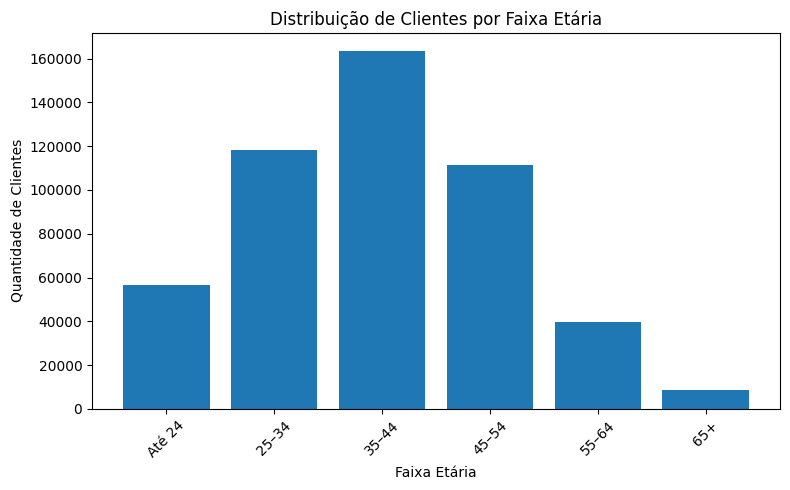

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(df_faixa["faixa_etaria"], df_faixa["quantidade"])
plt.title("Distribuição de Clientes por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Quantidade de Clientes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## RESUMO - Faixa etária

A base de clientes é majoritariamente composta por adultos entre 25 e 54 anos, com destaque para a faixa 35–44 anos, que representa o maior volume de clientes. <br>
As faixas etárias mais jovens (até 24 anos) e mais avançadas (65+) possuem menor representatividade, o que pode sugerir um público a ser explorado ou totalmente fora do ICP.

## B) Distribuição por Região (Estado)

In [ ]:
df_estado = (
    df_vendas["estado"]
    .value_counts()
    .reset_index()
)

df_estado.columns = ["estado", "quantidade"]
# Total de registros
total_clientes = df_estado["quantidade"].sum()

# Criar coluna percentual
df_estado["percentual"] = (
    df_estado["quantidade"] / total_clientes * 100
).round(2)

df_estado.head(10)


,estado,quantidade,percentual
0,SÃO PAULO,160929,32.28
1,RIO DE JANEIRO,88967,17.84
2,PARANÁ,69737,13.99
3,BAHIA,59269,11.89
4,RIO GRANDE DO SUL,49982,10.03
5,SANTA CATARINA,49872,10.00
6,PARAÍBA,19807,3.97


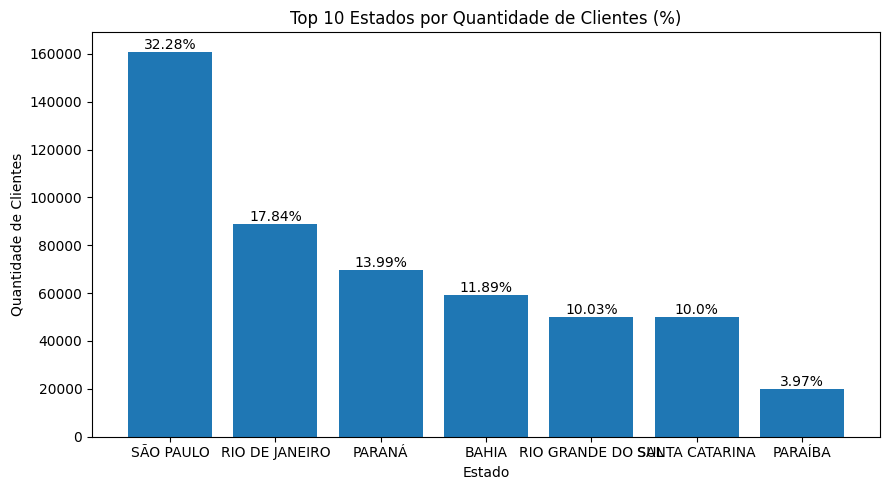

In [ ]:
top_estados = df_estado.head(10)

plt.figure(figsize=(9,5))
plt.bar(top_estados["estado"], top_estados["quantidade"])

# Adicionar rótulos de percentual em cima das barras
for i, row in top_estados.iterrows():
    plt.text(
        i,
        row["quantidade"],
        f'{row["percentual"]}%',
        ha="center",
        va="bottom"
    )

plt.title("Top 10 Estados por Quantidade de Clientes (%)")
plt.xlabel("Estado")
plt.ylabel("Quantidade de Clientes")
plt.tight_layout()
plt.show()


## Resumo Distribuição de Estados
A distribuição geográfica mostra forte concentração nos estados do Sudeste e Sul, com São Paulo representando a maior parcela da base de clientes.

## C) Identificação de Perfis Predominantes

In [ ]:
# Total de registros
total_registros = df_vendas.shape[0]

# Agrupamento com percentual
perfil_predominante = (
    df_vendas
    .groupby(["estado", "faixa_etaria"], as_index=False)
    .size()
    .rename(columns={"size": "quantidade"})
)

perfil_predominante["percentual"] = (
    perfil_predominante["quantidade"] / total_registros * 100
).round(2)

perfil_predominante = perfil_predominante.sort_values(
    "quantidade", ascending=False
)

perfil_predominante.head(10)


/tmp/ipython-input-1007217220.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["estado", "faixa_etaria"], as_index=False)


,estado,faixa_etaria,quantidade,percentual
38,SÃO PAULO,35–44,53090,10.64
37,SÃO PAULO,25–34,38591,7.73
39,SÃO PAULO,45–54,35941,7.20
20,RIO DE JANEIRO,35–44,28476,5.71
8,PARANÁ,35–44,22492,4.51
19,RIO DE JANEIRO,25–34,21682,4.35
21,RIO DE JANEIRO,45–54,19959,4.00
2,BAHIA,35–44,19330,3.87
36,SÃO PAULO,Até 24,17952,3.60
32,SANTA CATARINA,35–44,16851,3.38


## Resumo Oportunidades

A análise dos perfis predominantes mostra forte concentração de clientes adultos entre 35 e 44 anos, especialmente nos estados de São Paulo, Rio de Janeiro e Paraná. <br>
O estado de São Paulo concentra os maiores volumes absolutos em praticamente todas as faixas etárias.


---



Observa-se que, dentro dos principais estados, as faixas etárias entre 25 e 54 anos representam a maior parcela da base, indicando um público economicamente ativo e com consumo recorrente de produtos para casa e jardim. Esse perfil sugere oportunidades para estratégias de fidelização, campanhas segmentadas e expansão de ticket médio nesses grupos.

# 2) Performance por categoria de produto
- Categorias mais vendidas e menos vendidas (por volume e por faturamento)
- Ticket médio por categoria
- Pareto (80/20) de categorias por faturamento (se aplicável)


## Categorias mais vendidas e menos vendidas

### Por Volume

In [ ]:
#Por Volume
volume_categoria = (
    df_vendas.groupby("categoria")["quantidade_vendida"]
      .sum()
      .sort_values(ascending=False)
)

# Soma total
total_volume = volume_categoria.sum()

# DataFrame final
volume_categoria_df = (
    volume_categoria
        .reset_index()
        .rename(columns={"quantidade_vendida": "quantidade"})
)

volume_categoria_df["percentual"] = (
    volume_categoria_df["quantidade"] / total_volume * 100
).round(2)

volume_categoria_df



,categoria,quantidade,percentual
0,MANGUEIRAS,29762201,32.08
1,UTILIDADES DOMÉSTICAS,20360515,21.95
2,JARDINAGEM,20012180,21.57
3,LIMPEZA,16136702,17.40
4,MAQUINA DE CORTAR GRAMA,6491476,7.00


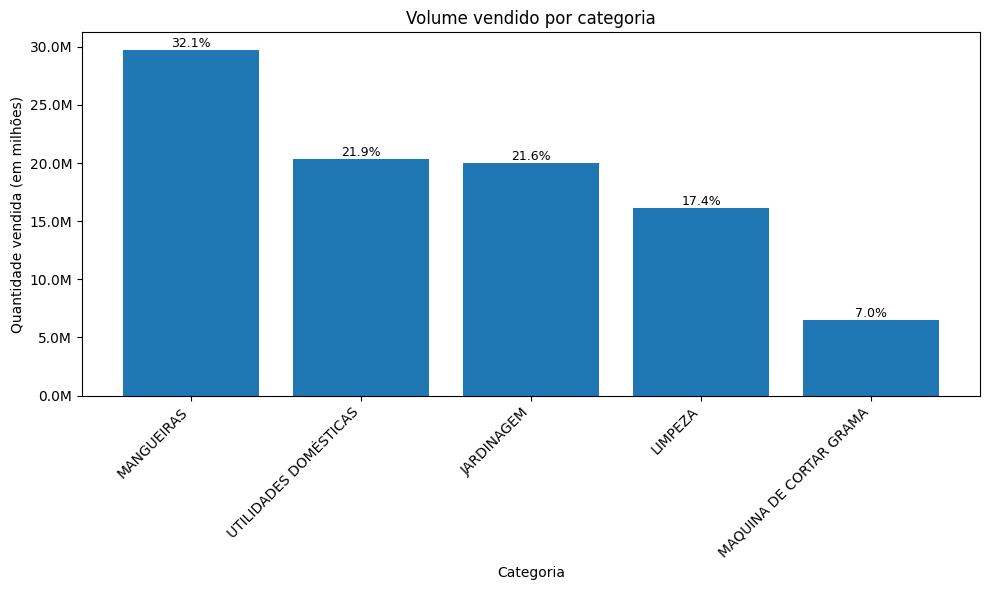

In [ ]:
plt.figure(figsize=(10,6))
bars = plt.bar(
    volume_categoria_df["categoria"],
    volume_categoria_df["quantidade"]
)

plt.title("Volume vendido por categoria")
plt.xlabel("Categoria")
plt.ylabel("Quantidade vendida (em milhões)")
plt.xticks(rotation=45, ha="right")

# Formatar eixo Y para milhões
plt.gca().yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M')
)

# Percentual em cima das barras
for bar, pct in zip(bars, volume_categoria_df["percentual"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{pct:.1f}%",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()



### Por Faturamento

In [ ]:
# Por Faturamento

faturamento_categoria = (
    df_vendas.groupby("categoria")["valor_total"]
      .sum()
      .sort_values(ascending=False)
)

# Soma total do faturamento
total_faturamento = faturamento_categoria.sum()

# DataFrame final
faturamento_categoria_df = (
    faturamento_categoria
        .reset_index()
        .rename(columns={"valor_total": "faturamento"})
)

faturamento_categoria_df["percentual"] = (
    faturamento_categoria_df["faturamento"] / total_faturamento * 100
).round(2)

faturamento_categoria_df



,categoria,faturamento,percentual
0,JARDINAGEM,1000609000,33.25
1,UTILIDADES DOMÉSTICAS,916223175,30.44
2,LIMPEZA,484101060,16.08
3,MANGUEIRAS,446433015,14.83
4,MAQUINA DE CORTAR GRAMA,162286900,5.39


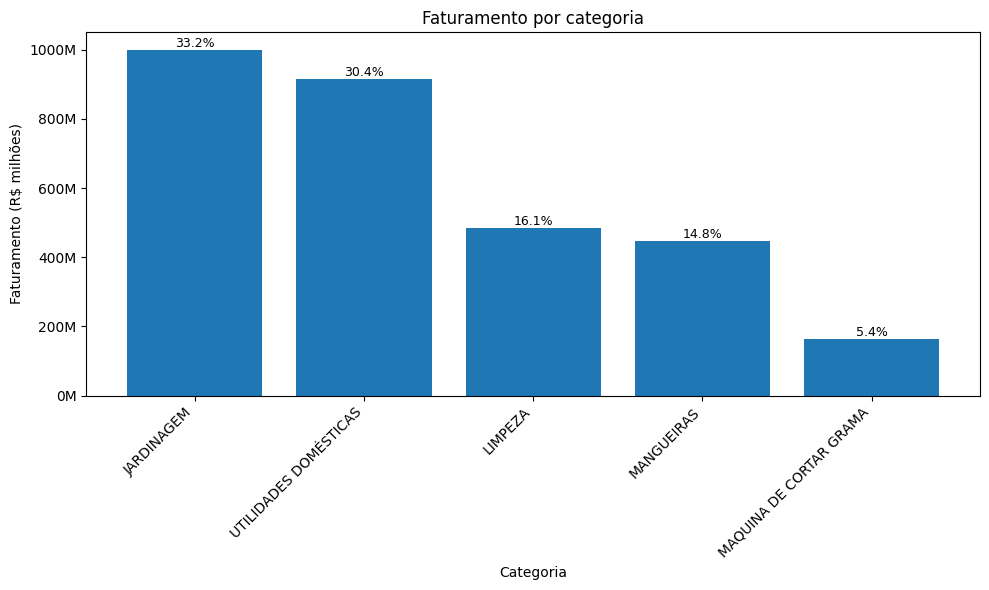

In [ ]:
plt.figure(figsize=(10,6))
bars = plt.bar(
    faturamento_categoria_df["categoria"],
    faturamento_categoria_df["faturamento"]
)

plt.title("Faturamento por categoria")
plt.xlabel("Categoria")
plt.ylabel("Faturamento (R$ milhões)")
plt.xticks(rotation=45, ha="right")

# Formatar eixo Y para milhões
plt.gca().yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f'{x/1_000_000:.0f}M')
)

# Percentual em cima das barras
for bar, pct in zip(bars, faturamento_categoria_df["percentual"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{pct:.1f}%",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()


## Resumo - Categorias Mais e Menos Vendidas

| Categoria               | % Volume | Posição em Volume | Posição em Faturamento |
| ----------------------- | -------- | ----------------- | ---------------------- |
| MANGUEIRAS              | 32,08%   | 1ª                | 4ª                     |
| UTILIDADES DOMÉSTICAS   | 21,95%   | 2ª                | 2ª                     |
| JARDINAGEM              | 21,57%   | 3ª                | 1ª                     |
| LIMPEZA                 | 17,40%   | 4ª                | 3ª                     |
| MÁQUINA DE CORTAR GRAMA | 7,00%    | 5ª                | 5ª                     |
<br>
---

## Análise por categoria

#### - MANGUEIRAS

- Maior volume vendido (32%)

- Apenas 4ª em faturamento

- Indica baixo ticket médio

- Produto de alto giro

#### - JARDINAGEM

- 3ª em volume (~22%)

- 1ª em faturamento

- Forte para ticket médio elevado

- Categoria interessante para margem e receita

#### - UTILIDADES DOMÉSTICAS

- Volume e faturamento bem alinhados

- Bom desempenho tanto em giro quanto em receita

#### - LIMPEZA

- Volume intermediário

- Faturamento proporcionalmente maior que o volume

- Indica ticket médio acima da média do portfólio

#### - MÁQUINA DE CORTAR GRAMA

- Menor volume e menor faturamento

- Produto de compra esporádica

- Pode ter ticket alto, mas baixo giro limita o impacto no total
<br>

---

# Conclusões parciais

Alto volume / baixo faturamento (Mangueiras)

Volume médio / alto faturamento (Jardinagem)

Equilíbrio entre volume e receita (Utilidades Domésticas)

## Ticket Médio Por Categoria

In [ ]:
ticket_medio_categoria = (
    df_vendas.groupby("categoria")
      .agg({
          "valor_total": "sum",
          "quantidade_vendida": "sum"
      })
)

ticket_medio_categoria["ticket_medio"] = (
    ticket_medio_categoria["valor_total"] / ticket_medio_categoria["quantidade_vendida"]
)

ticket_medio_categoria = ticket_medio_categoria.sort_values(
    by="ticket_medio", ascending=False
)

ticket_medio_categoria


,valor_total,quantidade_vendida,ticket_medio
categoria,,,
JARDINAGEM,1000609000,20012180,50.0
UTILIDADES DOMÉSTICAS,916223175,20360515,45.0
LIMPEZA,484101060,16136702,30.0
MAQUINA DE CORTAR GRAMA,162286900,6491476,25.0
MANGUEIRAS,446433015,29762201,15.0


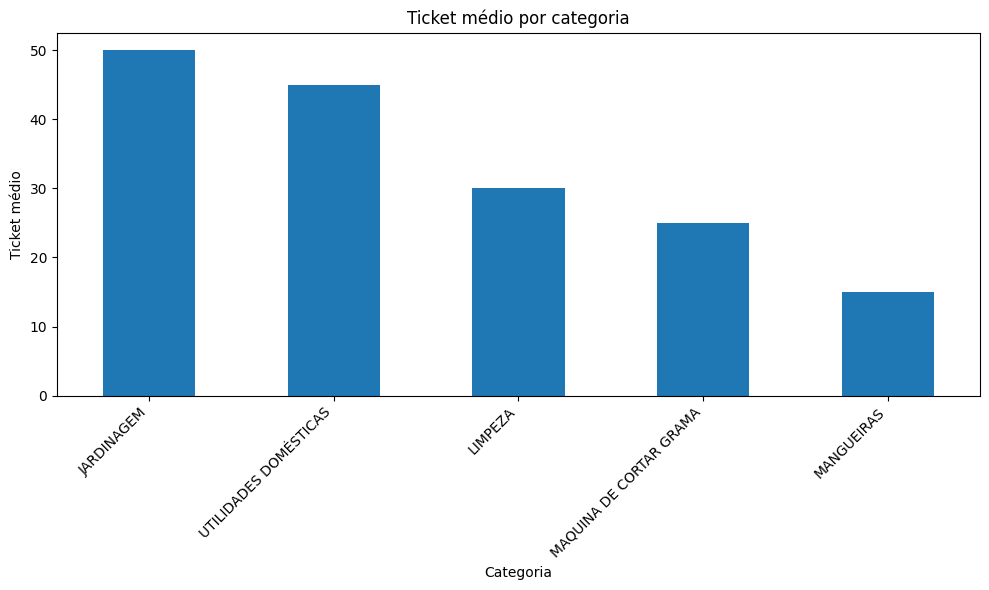

In [ ]:
plt.figure(figsize=(10,6))
ticket_medio_categoria["ticket_medio"].plot(kind="bar")
plt.title("Ticket médio por categoria")
plt.xlabel("Categoria")
plt.ylabel("Ticket médio")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Resumo integrado – Volume, Faturamento e Ticket Médio por categoria

JARDINAGEM <br>
Lidera o faturamento total mesmo não sendo a categoria de maior volume, sustentada pelo maior ticket médio (R$ 50,00). Trata-se da categoria com maior valor agregado, sendo estratégica para a geração de receita.
<br><br>

UTILIDADES DOMÉSTICAS<br>
Apresenta equilíbrio entre volume e faturamento, com ticket médio elevado (R$ 45,00). Atua como uma categoria estável, contribuindo de forma consistente tanto para o giro quanto para a receita.
<br><br>

LIMPEZA<br>
Possui volume intermediário e ticket médio moderado (R$ 30,00). Seu faturamento é proporcional ao volume, indicando uma categoria de desempenho regular, sem extremos de giro ou valor unitário.
<br><br>

MÁQUINA DE CORTAR GRAMA<br>
Registra baixo volume, porém com ticket médio superior ao de Mangueiras (R$ 25,00). O baixo giro limita sua contribuição total, caracterizando um produto de compra menos frequente.
<br><br>

MANGUEIRAS<br>
Apesar de liderar o volume de vendas, apresenta o menor ticket médio (R$ 15,00), o que reduz sua participação no faturamento. Atua como categoria de alto giro e baixo valor unitário.

## Pareto

In [ ]:
pareto = faturamento_categoria.reset_index()
pareto.columns = ["categoria", "faturamento"]

pareto["faturamento_acumulado"] = pareto["faturamento"].cumsum()
pareto["percentual_acumulado"] = (
    pareto["faturamento_acumulado"] / pareto["faturamento"].sum()
)
pareto

,categoria,faturamento,faturamento_acumulado,percentual_acumulado
0,JARDINAGEM,1000609000,1000609000,0.332467
1,UTILIDADES DOMÉSTICAS,916223175,1916832175,0.636895
2,LIMPEZA,484101060,2400933235,0.797744
3,MANGUEIRAS,446433015,2847366250,0.946078
4,MAQUINA DE CORTAR GRAMA,162286900,3009653150,1.000000


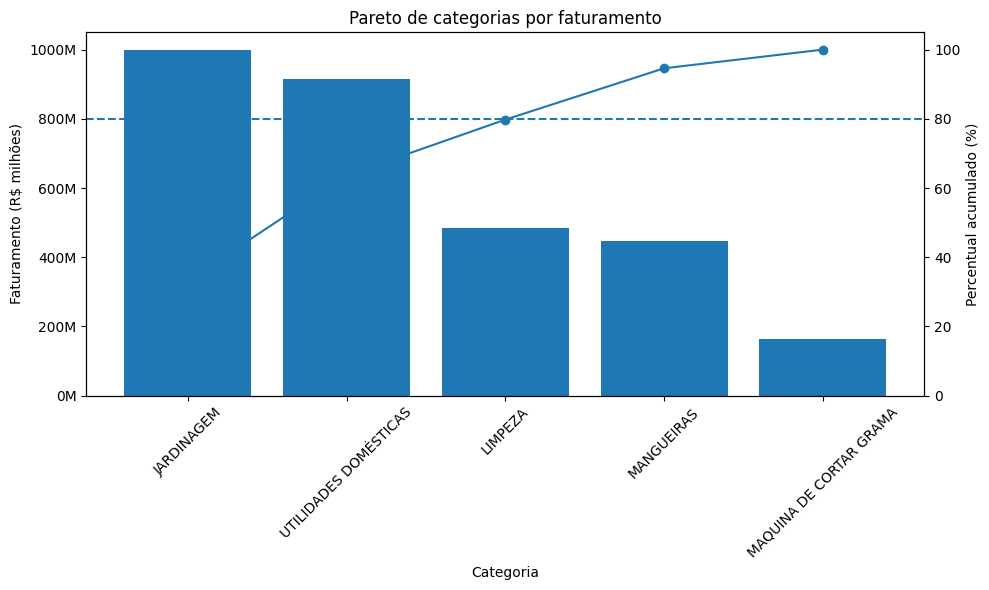

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Barras: faturamento
ax1.bar(pareto["categoria"], pareto["faturamento"])
ax1.set_xlabel("Categoria")
ax1.set_ylabel("Faturamento (R$ milhões)")
ax1.tick_params(axis="x", rotation=45)

# Formatar faturamento em milhões
ax1.yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f'{x/1_000_000:.0f}M')
)

# Linha: percentual acumulado
ax2 = ax1.twinx()
ax2.plot(
    pareto["categoria"],
    pareto["percentual_acumulado"] * 100,
    marker="o"
)
ax2.set_ylabel("Percentual acumulado (%)")

# Linha de 80%
ax2.axhline(80, linestyle="--")

# Limites do eixo percentual
ax2.set_ylim(0, 105)

plt.title("Pareto de categorias por faturamento")
plt.tight_layout()
plt.show()



## Resumo Pareto

| Categoria               | % acumulado do faturamento |
| ----------------------- | -------------------------- |
| Jardinagem              | 33,25%                     |
| Utilidades Domésticas   | 63,69%                     |
| Limpeza                 | 79,77%                     |
| Mangueiras              | 94,61%                     |
| Máquina de Cortar Grama | 100,00%                    |

---
- **Jardinagem** aparece como a categoria mais estratégica:

        Top 1 em faturamento
        Alto ticket médio
        Forte impacto no acumulado logo no início do Pareto

- **Utilidades Domésticas** reforça estabilidade e recorrência, sustentando o crescimento do faturamento acumulado.

- **Limpeza** funciona como categoria de fechamento do Pareto, sendo decisiva para alcançar o patamar de 80%.

- **Mangueiras**, apesar de liderar em volume, tem menor peso no Pareto devido ao baixo ticket médio.

- **Máquina de Cortar Grama** tem impacto marginal no faturamento total.


# 3) Sazonalidade
- Existe relação entre vendas e época do ano?
- Meses com maior e menor faturamento
- Comparação trimestre a trimestre (ou mês a mês)


In [ ]:
# Garantir que a data está no formato datetime
df_vendas["data"] = pd.to_datetime(df_vendas["data"])

# Criar colunas auxiliares
df_vendas["ano"] = df_vendas["data"].dt.year
df_vendas["mes"] = df_vendas["data"].dt.month
df_vendas["mes_nome"] = df_vendas["data"].dt.month_name()
df_vendas["trimestre"] = df_vendas["data"].dt.to_period("Q")


##Faturamento por mês (agregado)

In [ ]:
faturamento_mensal = (
    df_vendas.groupby("mes")["valor_total"]
    .sum()
    .reset_index()
)


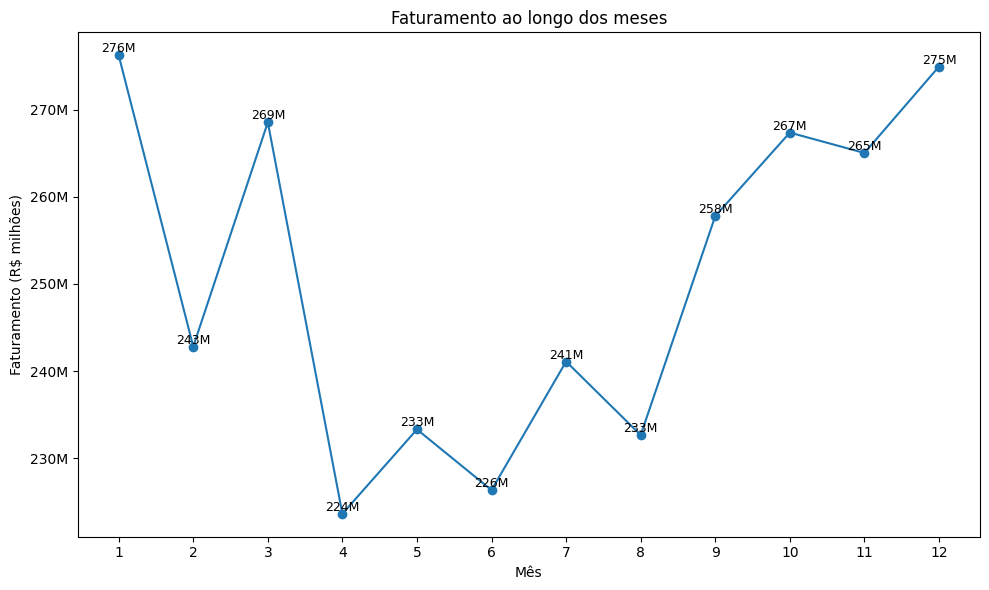

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(
    faturamento_mensal["mes"],
    faturamento_mensal["valor_total"],
    marker="o"
)

plt.title("Faturamento ao longo dos meses")
plt.xlabel("Mês")
plt.ylabel("Faturamento (R$ milhões)")

# Formatar eixo Y em milhões
plt.gca().yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f'{x/1_000_000:.0f}M')
)

plt.xticks(range(1,13))

for x, y in zip(faturamento_mensal["mes"], faturamento_mensal["valor_total"]):
    plt.text(
        x,
        y,
        f'{y/1_000_000:.0f}M',
        ha='center',
        va='bottom',
        fontsize=9
    )


plt.tight_layout()
plt.show()


##Comparação mês a mês

In [ ]:
faturamento_mes_ano = (
    df_vendas.groupby(["ano", "mes"])["valor_total"]
    .sum()
    .reset_index()
)


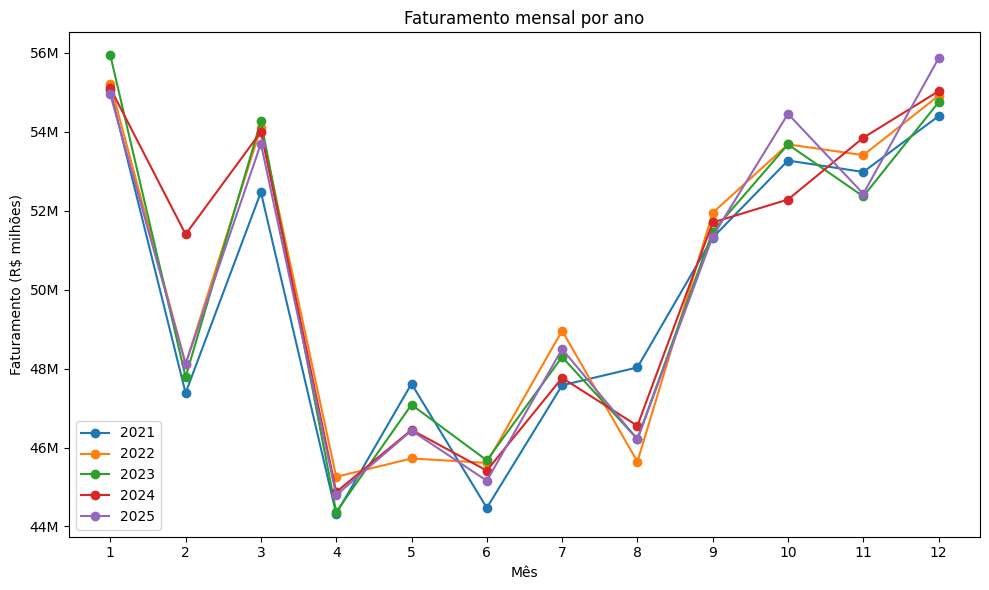

In [ ]:
plt.figure(figsize=(10,6))

for ano in faturamento_mes_ano["ano"].unique():
    dados_ano = faturamento_mes_ano[faturamento_mes_ano["ano"] == ano]
    plt.plot(
        dados_ano["mes"],
        dados_ano["valor_total"],
        marker="o",
        label=str(ano)
    )

plt.title("Faturamento mensal por ano")
plt.xlabel("Mês")
plt.ylabel("Faturamento (R$ milhões)")
plt.xticks(range(1,13))
plt.legend()

plt.gca().yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f'{x/1_000_000:.0f}M')
)

plt.tight_layout()
plt.show()


##Comparação trimestre a trimestre

In [ ]:
faturamento_trimestre = (
    df_vendas.groupby("trimestre")["valor_total"]
    .sum()
    .reset_index()
)


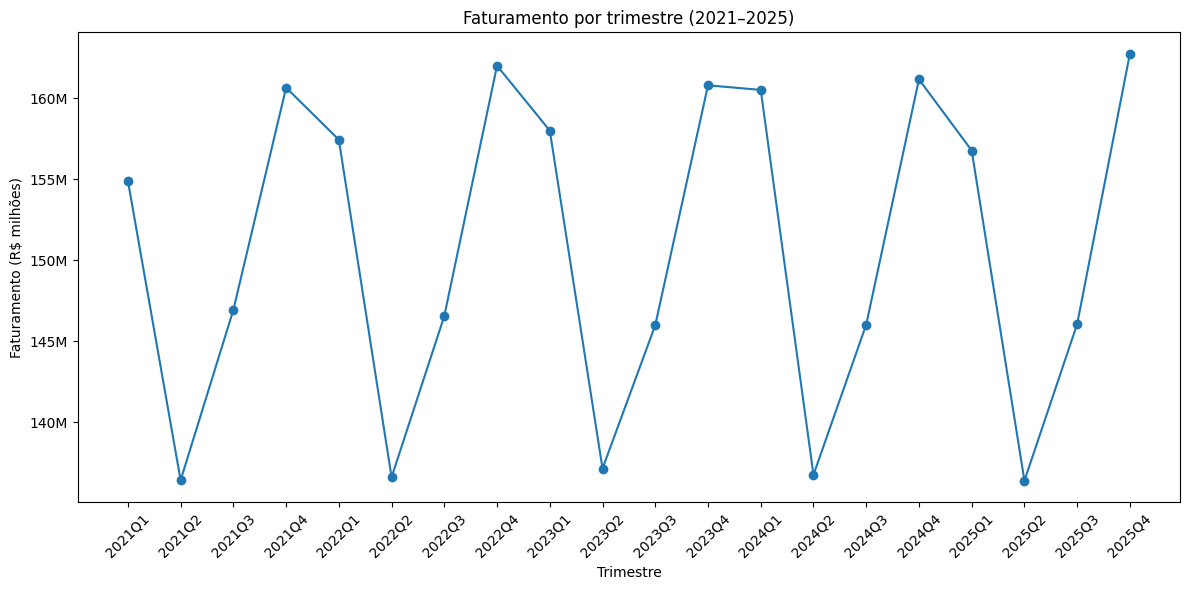

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(
    faturamento_trimestre["trimestre"].astype(str),
    faturamento_trimestre["valor_total"],
    marker="o"
)

plt.title("Faturamento por trimestre (2021–2025)")
plt.xlabel("Trimestre")
plt.ylabel("Faturamento (R$ milhões)")
plt.xticks(rotation=45)

# Formatar eixo Y em milhões
plt.gca().yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f'{x/1_000_000:.0f}M')
)

plt.tight_layout()
plt.show()



##Análise de Sazonalidade das Vendas (2021–2025)

A análise dos gráficos indica um padrão sazonal consistente ao longo dos anos, com meses e trimestres que se repetem como períodos de maior e menor faturamento. Esse comportamento aparece tanto no acumulado mensal, quanto na comparação mês a mês por ano e na visão trimestral, reforçando que a sazonalidade não é pontual, mas estrutural.


---


**Meses com maior e menor faturamento**

1- Maiores faturamentos:

Janeiro, março e principalmente o período de setembro a dezembro, com destaque
para outubro e dezembro.

O último trimestre concentra os maiores valores recorrentes, indicando forte aquecimento no fim do ano.

2- Menores faturamentos:

Abril e junho aparecem de forma consistente como os meses de menor faturamento.

Há uma queda clara no faturamento logo após o primeiro trimestre, antes da retomada gradual no segundo semestre.

Esse padrão se repete quando observamos os dados separados por ano, o que reforça a existência de sazonalidade mensal.

**Comparação trimestre a trimestre**

- O 4º trimestre (Q4) é sistematicamente o mais forte em faturamento, liderando em todos os anos analisados.

- O 2º trimestre (Q2) apresenta, de forma recorrente, os menores volumes de faturamento, funcionando como um período de desaceleração.

- O 1º e o 3º trimestres apresentam desempenho intermediário, com recuperação progressiva ao longo do ano.

A visualização em linha evidencia esse ciclo anual, mostrando quedas e picos que se repetem de forma previsível.

# 4) Tendência de vendas por região
- Evolução das vendas por região ao longo do tempo
- Identificação de regiões em crescimento/queda
- Comparação entre regiões (faturamento, volume, ticket médio)

In [ ]:
#dicionário de regiões

def normalizar_texto(texto):
    if pd.isna(texto):
        return None
    return (
        unicodedata.normalize("NFKD", str(texto))
        .encode("ASCII", "ignore")
        .decode("ASCII")
        .strip()
        .upper()
    )



In [ ]:
df_vendas["estado_norm"] = df_vendas["estado"].apply(normalizar_texto)


In [ ]:
mapa_regioes = {
    # Norte
    "ACRE": "Norte",
    "AMAPA": "Norte",
    "AMAZONAS": "Norte",
    "PARA": "Norte",
    "RONDONIA": "Norte",
    "RORAIMA": "Norte",
    "TOCANTINS": "Norte",

    # Nordeste
    "ALAGOAS": "Nordeste",
    "BAHIA": "Nordeste",
    "CEARA": "Nordeste",
    "MARANHAO": "Nordeste",
    "PARAIBA": "Nordeste",
    "PERNAMBUCO": "Nordeste",
    "PIAUI": "Nordeste",
    "RIO GRANDE DO NORTE": "Nordeste",
    "SERGIPE": "Nordeste",

    # Centro-Oeste
    "DISTRITO FEDERAL": "Centro-Oeste",
    "GOIAS": "Centro-Oeste",
    "MATO GROSSO": "Centro-Oeste",
    "MATO GROSSO DO SUL": "Centro-Oeste",

    # Sudeste
    "ESPIRITO SANTO": "Sudeste",
    "MINAS GERAIS": "Sudeste",
    "RIO DE JANEIRO": "Sudeste",
    "SAO PAULO": "Sudeste",

    # Sul
    "PARANA": "Sul",
    "RIO GRANDE DO SUL": "Sul",
    "SANTA CATARINA": "Sul"
}


In [ ]:
df_vendas["regiao"] = df_vendas["estado_norm"].map(mapa_regioes)


In [ ]:
df_vendas[df_vendas["regiao"].isna()]["estado"].value_counts()


,count
estado,


##Faturamento semestral por região


In [ ]:
df_vendas["semestre"] = df_vendas["data"].dt.to_period("2Q")


In [ ]:
faturamento_regiao_semestre = (
    df_vendas
    .groupby(["semestre", "regiao"])["valor_total"]
    .sum()
    .reset_index()
)



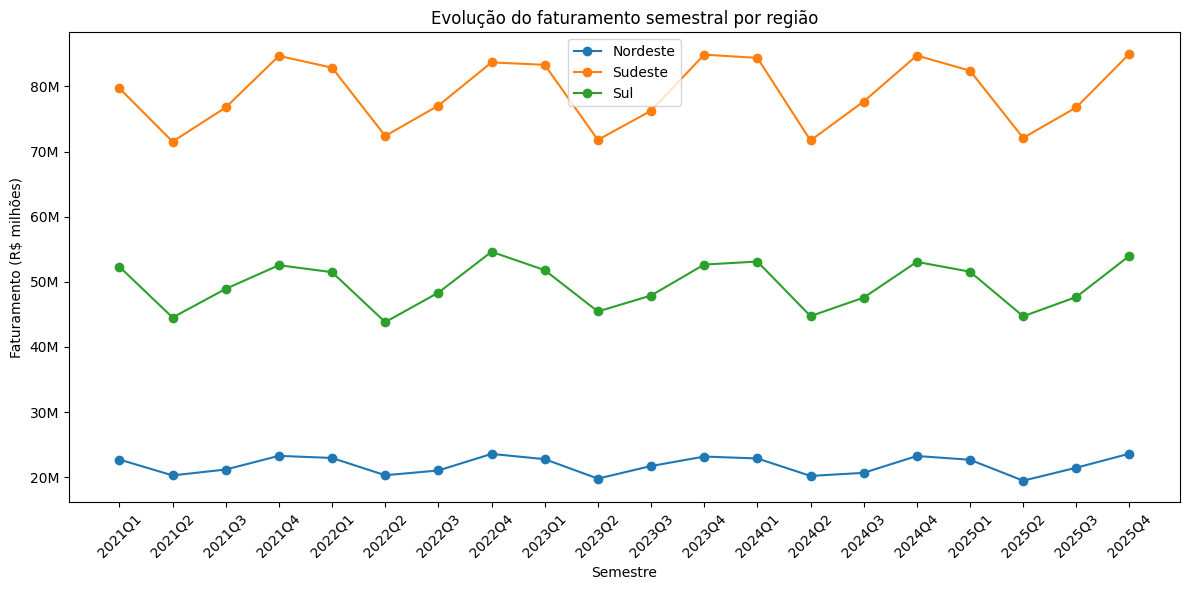

In [ ]:
plt.figure(figsize=(12,6))

for regiao in faturamento_regiao_semestre["regiao"].unique():
    dados = faturamento_regiao_semestre[faturamento_regiao_semestre["regiao"] == regiao]
    plt.plot(
        dados["semestre"].astype(str),
        dados["valor_total"],
        marker="o",
        label=regiao
    )

plt.title("Evolução do faturamento semestral por região")
plt.xlabel("Semestre")
plt.ylabel("Faturamento (R$ milhões)")
plt.xticks(rotation=45)
plt.legend()

plt.gca().yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f'{x/1_000_000:.0f}M')
)

plt.tight_layout()
plt.show()



A análise semestral evidencia padrões consistentes e bem definidos entre as regiões:

1. Sudeste

- Mantém liderança absoluta em faturamento ao longo de todo o período.

- Apresenta oscilações sazonais, mas com patamar estruturalmente mais alto que as demais regiões.

- O comportamento indica um mercado maduro e resiliente, com variações previsíveis.

2. Sul

- Ocupa posição intermediária, com faturamento consistentemente abaixo do Sudeste, mas acima do Nordeste.

- Mostra estabilidade ao longo do tempo, acompanhando o mesmo padrão cíclico do Sudeste, porém em menor escala.

- Indica um mercado estável, sem grandes saltos ou quedas abruptas.

3. Nordeste

- Possui o menor nível de faturamento entre as regiões.

- A evolução temporal é mais sensível a oscilações, com variações relativamente maiores em proporção.

- Sugere um mercado mais volátil, possivelmente mais dependente de fatores sazonais ou econômicos locais.



---



##Identificação de regiões em crescimento/queda

In [ ]:
#Crescimento acumulado por região

# Garantir que a coluna ano existe

df_vendas["ano"] = pd.to_datetime(df_vendas["data"]).dt.year

crescimento_regiao = (
    df_vendas
    .groupby(["ano", "regiao"])["valor_total"]
    .sum()
    .reset_index()
)

crescimento_pivot = crescimento_regiao.pivot(
    index="regiao",
    columns="ano",
    values="valor_total"
)

ano_inicio = crescimento_pivot.columns.min()
ano_fim = crescimento_pivot.columns.max()

crescimento_pivot["crescimento_pct"] = (
    (crescimento_pivot[ano_fim] - crescimento_pivot[ano_inicio])
    / crescimento_pivot[ano_inicio] * 100
).round(2)

crescimento_final = crescimento_pivot.reset_index()


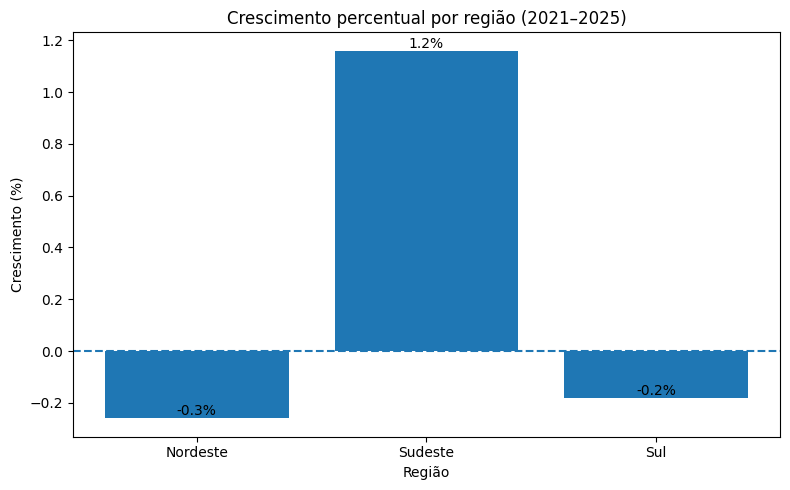

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(
    crescimento_final["regiao"],
    crescimento_final["crescimento_pct"]
)

plt.axhline(0, linestyle="--")
plt.title("Crescimento percentual por região (2021–2025)")
plt.xlabel("Região")
plt.ylabel("Crescimento (%)")

# Rótulos de dados
for i, v in enumerate(crescimento_final["crescimento_pct"]):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()


Identificação de regiões em crescimento ou queda (2021–2025)

O gráfico de crescimento percentual acumulado reforça diferenças estruturais entre as regiões:

1. Sudeste

Única região com crescimento positivo no período (+1,2%).

Indica expansão moderada, consistente com um mercado já consolidado.

2. Sul

Apresenta leve retração (-0,2%), sugerindo estagnação.

O comportamento não indica perda significativa de mercado, mas sim crescimento limitado.

3. Nordeste

Registra a maior queda percentual (-0,3%).

Reflete desafios de crescimento e maior exposição a variações econômicas.

Em termos de tendência:

- Sudeste: região em crescimento

- Sul: região estável

- Nordeste: região em retração leve

##Faturamento total por região

In [ ]:
faturamento_regiao = (
    df_vendas
    .groupby("regiao")["valor_total"]
    .sum()
    .reset_index()
    .sort_values("valor_total", ascending=False)
)


In [ ]:
def formatar_faturamento(x, pos=None):
    if x >= 1_000_000_000:
        return f'{x/1_000_000_000:.1f}B'
    else:
        return f'{x/1_000_000:.0f}M'


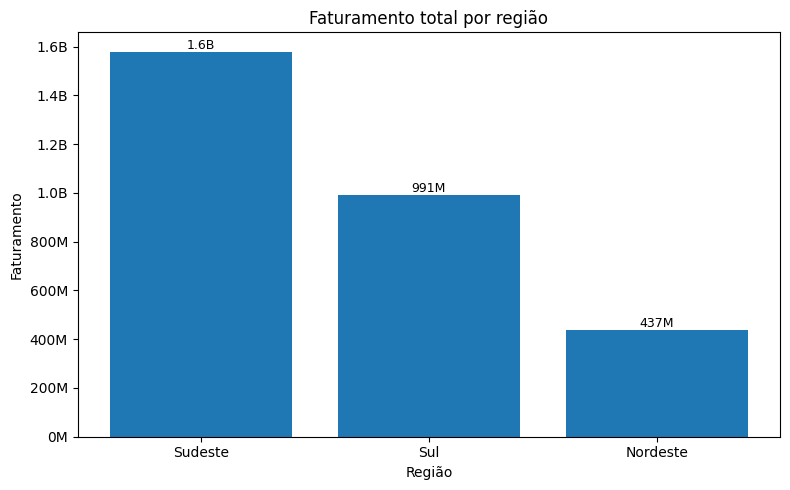

In [ ]:

plt.figure(figsize=(8,5))
bars = plt.bar(
    faturamento_regiao["regiao"],
    faturamento_regiao["valor_total"]
)

plt.title("Faturamento total por região")
plt.xlabel("Região")
plt.ylabel("Faturamento")

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_faturamento))

# Rótulos nas barras
for bar in bars:
    valor = bar.get_height()
    if valor >= 1_000_000_000:
        label = f'{valor/1_000_000_000:.1f}B'
    else:
        label = f'{valor/1_000_000:.0f}M'

    plt.text(
        bar.get_x() + bar.get_width() / 2,
        valor,
        label,
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()



##Volume vendido por região


In [ ]:
volume_regiao = (
    df_vendas
    .groupby("regiao")["quantidade_vendida"]
    .sum()
    .reset_index()
    .sort_values("quantidade_vendida", ascending=False)
)


In [ ]:
def formatar_volume(x, pos=None):
    return f'{x/1_000_000:.0f}M'

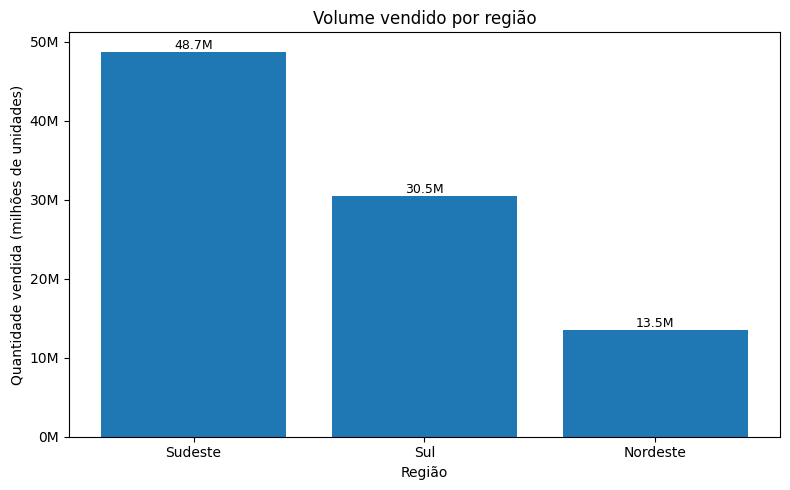

In [ ]:
plt.figure(figsize=(8,5))
bars = plt.bar(
    volume_regiao["regiao"],
    volume_regiao["quantidade_vendida"]
)

plt.title("Volume vendido por região")
plt.xlabel("Região")
plt.ylabel("Quantidade vendida (milhões de unidades)")

# Formatar eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_volume))

# Rótulos nas barras
for bar in bars:
    valor = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        valor,
        f'{valor/1_000_000:.1f}M',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()


##Ticket médio por região


In [ ]:
ticket_regiao = (
    df_vendas
    .groupby("regiao")
    .agg({
        "valor_total": "sum",
        "quantidade_vendida": "sum"
    })
    .reset_index()
)

ticket_regiao["ticket_medio"] = (
    ticket_regiao["valor_total"] / ticket_regiao["quantidade_vendida"]
).round(2)

ticket_regiao = ticket_regiao.sort_values("ticket_medio", ascending=False)


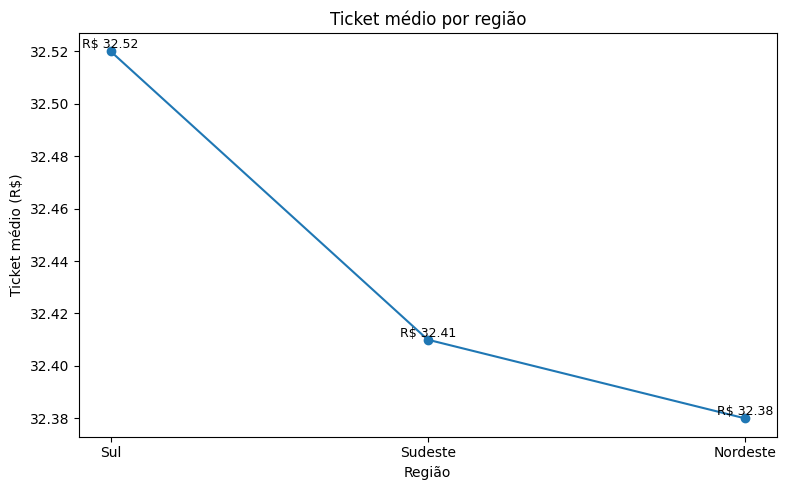

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(
    ticket_regiao["regiao"],
    ticket_regiao["ticket_medio"],
    marker="o"
)

plt.title("Ticket médio por região")
plt.xlabel("Região")
plt.ylabel("Ticket médio (R$)")

# Rótulos nos pontos
for x, y in zip(ticket_regiao["regiao"], ticket_regiao["ticket_medio"]):
    plt.text(
        x,
        y,
        f'R$ {y:.2f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()



###Comparação entre regiões - Faturamento, volume, ticket médio e Faturamento total

- Sudeste concentra a maior parte da receita (≈ R$ 1,6 bi), reforçando seu papel como principal mercado.

- Sul aparece em segundo lugar (≈ R$ 1,0 bi).

- Nordeste representa a menor parcela do faturamento total (≈ R$ 437 mi).

1. Volume vendido

A distribuição de volume segue o mesmo padrão do faturamento:

- Sudeste lidera em unidades vendidas.

- Sul mantém posição intermediária.

- Nordeste apresenta menor volume.

Isso indica que a diferença de faturamento é fortemente explicada pela escala de vendas, não apenas por preço.

2. Ticket médio

O ticket médio é muito semelhante entre as regiões, variando pouco em torno de R$ 32. Nenhuma região se destaca de forma relevante nesse indicador.

Isso sugere que o comportamento de preço é homogêneo, e as diferenças de desempenho estão ligadas principalmente a volume e penetração de mercado.


---



O Sudeste é o principal motor de vendas, combinando alto volume, maior faturamento e crescimento positivo.

O Sul apresenta um mercado estável, com bom volume e faturamento, mas crescimento limitado.

O Nordeste, apesar de ticket médio semelhante, enfrenta desafios de escala, resultando em menor faturamento e leve retração.

Pode-se notar que as diferenças regionais são explicadas muito mais por escala de vendas e maturidade de mercado do que por diferenças de preço.

#5) Relação entre idade e categorias compradas
- Existe correlação/associação entre faixa etária e categorias?
- Quais categorias são mais comuns em cada faixa etária?
- Recomendações práticas (ex.: segmentação, campanhas, mix de produtos)

##Heatmap de faturamento (valores absolutos)

In [ ]:
heatmap_fat = (
    df_vendas
    .groupby(["faixa_etaria", "categoria"])["valor_total"]
    .sum()
    .reset_index()
    .pivot(
        index="faixa_etaria",
        columns="categoria",
        values="valor_total"
    )
)



/tmp/ipython-input-2082624418.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["faixa_etaria", "categoria"])["valor_total"]


In [ ]:
heatmap_fat_fmt = heatmap_fat.copy()

def formatar_fat(valor):
    if valor >= 1_000_000_000:
        return f'{valor/1_000_000_000:.2f}B'
    else:
        return f'{valor/1_000_000:.0f}M'

heatmap_fat_labels = heatmap_fat_fmt.applymap(formatar_fat)

/tmp/ipython-input-121148769.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  heatmap_fat_labels = heatmap_fat_fmt.applymap(formatar_fat)


In [ ]:
#criar um formatter para faturamento

def formatar_fat_colorbar(x, pos=None):
    if x >= 1_000_000_000:
        return f'{x/1_000_000_000:.1f}B'
    else:
        return f'{x/1_000_000:.0f}M'

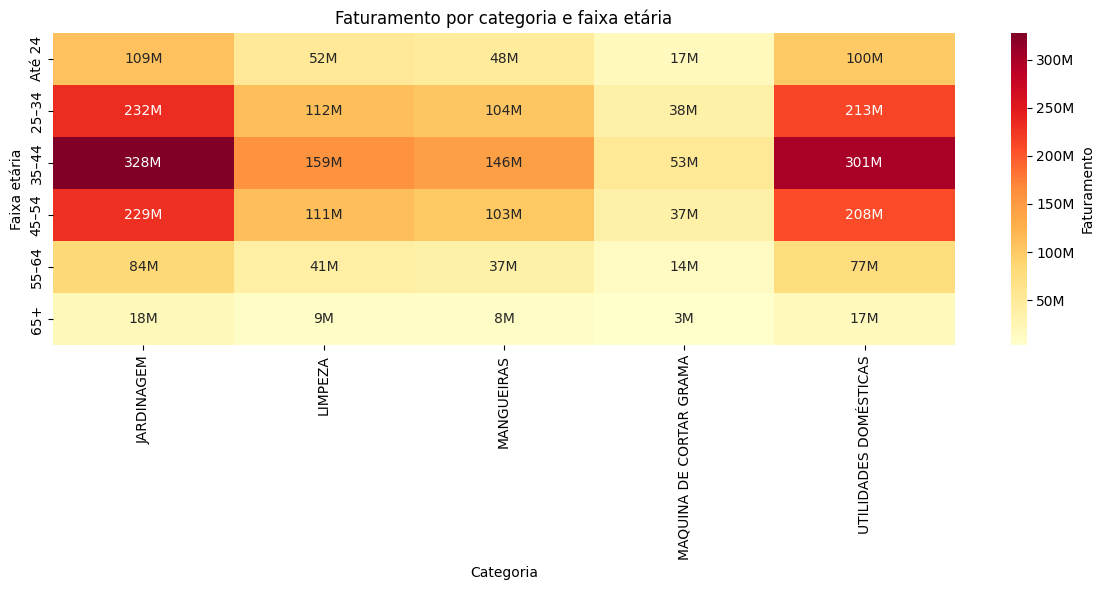

In [ ]:
plt.figure(figsize=(12,6))

ax = sns.heatmap(
    heatmap_fat,
    annot=heatmap_fat_labels,
    fmt="",
    cmap="YlOrRd",
    cbar_kws={"label": "Faturamento"}
)

# Formatar colorbar
cbar = ax.collections[0].colorbar
cbar.formatter = FuncFormatter(formatar_fat_colorbar)
cbar.update_ticks()

plt.title("Faturamento por categoria e faixa etária")
plt.xlabel("Categoria")
plt.ylabel("Faixa etária")
plt.tight_layout()
plt.show()


##Heatmap — Volume vendido por categoria e faixa etária

In [ ]:
#preparar os dados
heatmap_vol = (
    df_vendas
    .groupby(["faixa_etaria", "categoria"])["quantidade_vendida"]
    .sum()
    .reset_index()
    .pivot(
        index="faixa_etaria",
        columns="categoria",
        values="quantidade_vendida"
    )
)


/tmp/ipython-input-1756164520.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["faixa_etaria", "categoria"])["quantidade_vendida"]


In [ ]:
#Criar rótulos formatados (milhões)
heatmap_vol_labels = heatmap_vol.applymap(
    lambda x: f'{x/1_000_000:.1f}M'
)


/tmp/ipython-input-1114958483.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  heatmap_vol_labels = heatmap_vol.applymap(


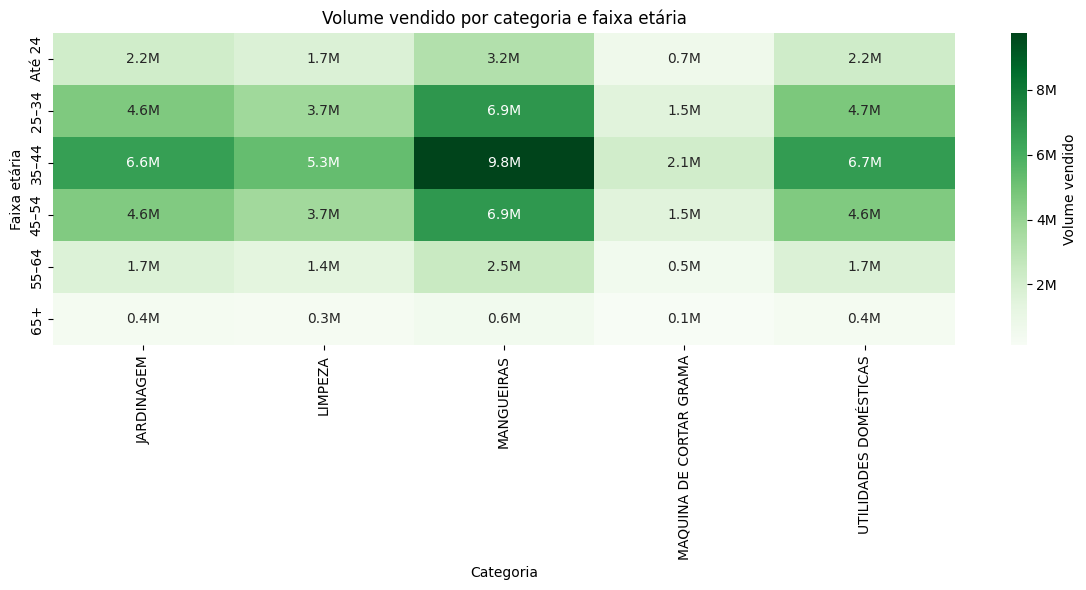

In [ ]:
plt.figure(figsize=(12,6))

ax = sns.heatmap(
    heatmap_vol,
    annot=heatmap_vol_labels,
    fmt="",
    cmap="Greens",
    cbar_kws={"label": "Volume vendido"}
)

# Formatar colorbar
def formatar_volume_cb(x, pos=None):
    return f'{x/1_000_000:.0f}M'

cbar = ax.collections[0].colorbar
cbar.formatter = FuncFormatter(formatar_volume_cb)
cbar.update_ticks()

plt.title("Volume vendido por categoria e faixa etária")
plt.xlabel("Categoria")
plt.ylabel("Faixa etária")
plt.tight_layout()
plt.show()


###Correlação/associação entre faixa etária e categorias

Há uma associação clara entre faixa etária e categorias, tanto em volume quanto em faturamento.
O padrão mostra que diferentes faixas etárias concentram consumo e receita em categorias específicas, indicando preferências distintas e comportamentos de compra diferentes.

- Faixas intermediárias (25–54) concentram maior volume e faturamento

- Faixas extremas (Até 24 e 65+) têm menor impacto absoluto, mas padrões consistentes

Categorias são mais comuns em cada faixa etária

**Até 24**

Volume e faturamento moderados, com destaque para:

- Jardinagem

- Utilidades Domésticas

Indica consumo mais básico e menor ticket agregado.

**25–34**

Forte presença em:

- Mangueiras

- Utilidades Domésticas

- Jardinagem

Já apresenta crescimento significativo de faturamento, sugerindo maior poder de compra.

**35–44 (faixa mais relevante)**

Faixa dominante em volume e faturamento

Destaques claros:

- Jardinagem

- Utilidades Domésticas

- Mangueiras

Indica público principal do negócio, com alto consumo e maior impacto financeiro.

**45–54**

Padrão muito semelhante à faixa 35–44

- Mantém alto faturamento nas mesmas categorias, porém em menor intensidade.

- Público fiel e consistente.

**55–64**

Redução de volume e faturamento

Mantém preferência por:

- Jardinagem

- Utilidades Domésticas

Indica consumo mais seletivo.

**65+**

Menor participação geral

Consumo concentrado em:

- Jardinagem

- Utilidades Domésticas

Perfil mais conservador e focado em necessidades específicas.



---



Leitura conjunta: volume × faturamento

1. Mangueiras:

- Altíssimo volume em todas as faixas

- Faturamento proporcional → produto de giro

2. Jardinagem:

- Forte tanto em volume quanto em faturamento

- Categoria estratégica para todas as idades, especialmente 35–54

3. Utilidades Domésticas:

- Bom equilíbrio entre volume e faturamento

- Forte apelo transversal entre faixas

4. Máquina de cortar grama:

- Baixo volume, mas presença consistente

- Produto mais específico e de maior valor unitário

**Recomendações práticas**

Segmentação:

- Foco principal: faixas 25–54, especialmente 35–44

- Campanhas específicas para faixas mais jovens (Até 24) com produtos de entrada

- Comunicação mais funcional e direta para 55+

Campanhas:

- Mangueiras + Jardinagem

- Jardinagem + Utilidades Domésticas

- Cross-sell de máquinas para clientes frequentes de jardinagem

Mix de produtos:

- Garantir ampla disponibilidade de Mangueiras e Jardinagem

- Utilizar Máquinas como produto de upsell

- Ajustar mix regional/faixa etária conforme concentração observada